In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
!cp -RT '/content/gdrive/My Drive/Space/msl-images' /

In [3]:
import os
os.getcwd()


'/content'

In [4]:
os.chdir("../")

In [5]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
# from tensorflow.keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm

In [6]:
os.getcwd()

'/'

In [7]:
os.chdir('../')

In [8]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

In [9]:
import pandas as pd 
train = pd.read_csv("train-calibrated-shuffled.txt", sep=" ", header=None)

In [10]:
train.head()

,0,1
0,calibrated/0077ML0005780000102730I01_DRCL.JPG,15
1,calibrated/0072MR0005610170103642E01_DRCL.JPG,8
2,calibrated/0069MR0004130000103477I01_DRCL.JPG,21
3,calibrated/0154ML0008510010104492E01_DRCL.JPG,8
4,calibrated/0019MR0000530000100138C00_DRCL.JPG,8


In [11]:
len(train)

3746

In [12]:
train.columns=['id','label']
train.head()

,id,label
0,calibrated/0077ML0005780000102730I01_DRCL.JPG,15
1,calibrated/0072MR0005610170103642E01_DRCL.JPG,8
2,calibrated/0069MR0004130000103477I01_DRCL.JPG,21
3,calibrated/0154ML0008510010104492E01_DRCL.JPG,8
4,calibrated/0019MR0000530000100138C00_DRCL.JPG,8


In [13]:
test = pd.read_csv("test-calibrated-shuffled.txt", sep=" ")
test.columns=['id','label']

len(test)



1304

In [14]:
test.head()

,id,label
0,calibrated/0640MH0002640000203781I01_DRCL.JPG,24
1,calibrated/0647MH0003250050203806E01_DRCL.JPG,9
2,calibrated/0844MR0037590000501001I01_DRCL.JPG,7
3,calibrated/0618MR0026460020401253I01_DRCL.JPG,11
4,calibrated/0605MH0003060010203269I01_DRCL.JPG,8


In [15]:
val = pd.read_csv("val-calibrated-shuffled.txt", sep=" ")
val.columns=['id','label']


In [16]:
val.head()

,id,label
0,calibrated/0270MH0002530050102760I01_DRCL.JPG,5
1,calibrated/0549MH0002620000201566E01_DRCL.JPG,24
2,calibrated/0229MR0009720000202913E01_DRCL.JPG,0
3,calibrated/0292MH0002810020103613C00_DRCL.JPG,5
4,calibrated/0552MH0002620000201620I01_DRCL.JPG,24


In [17]:
len(val)

1639

In [18]:
import os

In [19]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import torch
import torchvision
import tarfile
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import random_split
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torchvision.transforms import ToTensor
from torch.utils.data.dataloader import DataLoader
import torch.nn as nn
from torchvision.utils import make_grid
import torchvision.models as models
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
os.getcwd()

'/'

In [21]:
!rm -rf /aboli

In [22]:
!mkdir /aboli

In [23]:
!mkdir /aboli/class_0
!mkdir /aboli/class_1
!mkdir /aboli/class_2
!mkdir /aboli/class_3
!mkdir /aboli/class_4
!mkdir /aboli/class_5
!mkdir /aboli/class_6
!mkdir /aboli/class_7
!mkdir /aboli/class_8
!mkdir /aboli/class_9
!mkdir /aboli/class_10
!mkdir /aboli/class_11
!mkdir /aboli/class_12
!mkdir /aboli/class_13
!mkdir /aboli/class_14
!mkdir /aboli/class_15
!mkdir /aboli/class_16
!mkdir /aboli/class_17
!mkdir /aboli/class_18
!mkdir /aboli/class_19
!mkdir /aboli/class_20
!mkdir /aboli/class_21
!mkdir /aboli/class_23
!mkdir /aboli/class_24

In [24]:
val.head()

,id,label
0,calibrated/0270MH0002530050102760I01_DRCL.JPG,5
1,calibrated/0549MH0002620000201566E01_DRCL.JPG,24
2,calibrated/0229MR0009720000202913E01_DRCL.JPG,0
3,calibrated/0292MH0002810020103613C00_DRCL.JPG,5
4,calibrated/0552MH0002620000201620I01_DRCL.JPG,24


In [25]:
train.head()

,id,label
0,calibrated/0077ML0005780000102730I01_DRCL.JPG,15
1,calibrated/0072MR0005610170103642E01_DRCL.JPG,8
2,calibrated/0069MR0004130000103477I01_DRCL.JPG,21
3,calibrated/0154ML0008510010104492E01_DRCL.JPG,8
4,calibrated/0019MR0000530000100138C00_DRCL.JPG,8


In [26]:
import os,shutil

x = 0
for i in train.index:
  try:
    fileo = '/' + str(train.at[i,"id"])   
    shutil.copy2(fileo, "/aboli/class_" + str(train.at[i,"label"]) + "/")
  except:
    print( str(train.at[i,"id"]))
    
     

In [27]:
x = 0
for i in test.index:
  try:
    fileo = '/' + str(test.at[i,"id"])   
    shutil.copy2(fileo, "/aboli/class_" + str(test.at[i,"label"]) + "/")
  except:
    print( str(test.at[i,"id"]))
    

In [28]:
x = 0
for i in val.index:
  try:
    fileo = '/' + str(val.at[i,"id"])   
    shutil.copy2(fileo, "/aboli/class_" + str(val.at[i,"label"]) + "/")
  except:
    print( str(val.at[i,"id"]))

In [29]:
data_dir ="/aboli"


In [30]:
transformer = torchvision.transforms.Compose(
    [  # Applying Augmentation
        torchvision.transforms.Resize((224, 224)),
        torchvision.transforms.RandomHorizontalFlip(p=0.5),
        torchvision.transforms.RandomVerticalFlip(p=0.5),
        torchvision.transforms.RandomRotation(40),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize(
            mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010]
        ),
    ]
)
database = ImageFolder(data_dir, transform=transformer)

In [31]:
database.classes

['class_0',
 'class_1',
 'class_10',
 'class_11',
 'class_12',
 'class_13',
 'class_14',
 'class_15',
 'class_16',
 'class_17',
 'class_18',
 'class_19',
 'class_2',
 'class_20',
 'class_21',
 'class_23',
 'class_24',
 'class_3',
 'class_4',
 'class_5',
 'class_6',
 'class_7',
 'class_8',
 'class_9']

In [32]:
flower_name_dict={'class_0':0 ,
                  'class_1':1,
                  'class_2':2 ,
                  'class_3':3 ,
                  'class_4':4,
                  'class_5':5 ,
                  'class_6':6,
                  'class_7':7 ,
                  'class_8':8 ,
                  'class_9':9,
                  'class_10':10 ,
                  'class_11':11,
                  'class_12':12 ,
                  'class_13':13 ,
                  'class_14':14,
                  'class_15':15 ,
                  'class_16':16,
                  'class_17':17 ,
                  'class_18':18 ,
                  'class_19':19,
                  'class_20':20 ,
                  'class_21':21,
                  'class_23':22 ,
                  'class_24':23                  
                  
                  }

def encode_label(img_label):
    return flower_name_dict[img_label] 

In [33]:
flower_label = {
                  0: 'class_0',
                  1: 'class_1',
                  2: 'class_2' ,
                  3: 'class_3' ,
                  4: 'class_4',
                  5: 'class_5' ,
                  6: 'class_6',
                  7: 'class_7' ,
                  8: 'class_8' ,
                  9: 'class_9',
                  10: 'class_10',
                  11: 'class_11',
                  12: 'class_12' ,
                  13: 'class_13' ,
                  14: 'class_14',
                  15: 'class_15' ,
                  16: 'class_16',
                  17: 'class_17' ,
                  18: 'class_18' ,
                  19: 'class_19',
                  20: 'class_20' ,
                  21: 'class_21',
        
                  22: 'class_23' ,
                  23: 'class_24'   
}

In [34]:
def show_batch(dl,invert=True):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

def show_sample(image, label,invert=True):
    print("Label :" +database.classes[label] + "(" + str(label) + ")")
    plt.imshow(image.permute(1, 2, 0))

In [35]:
ls /calibrated | wc -l

6752


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label :class_0(0)


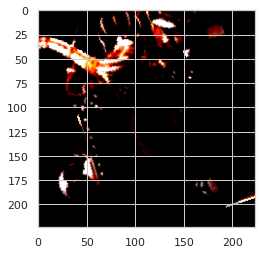

In [36]:
show_sample(*database[1])

In [37]:
validation_size = 2943
training_size = len(database) - validation_size

In [38]:
train_ds, val_ds_main = random_split(database,[training_size, validation_size])
val_ds, test_ds  = random_split(val_ds_main,[1639, 1304])
len(train_ds), len(val_ds)

(3746, 1639)

In [39]:
batch_size=32

In [40]:
train_dl = DataLoader(train_ds, batch_size , shuffle=True)
val_dl = DataLoader(val_ds,batch_size)
test_dl = DataLoader(test_ds, batch_size)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


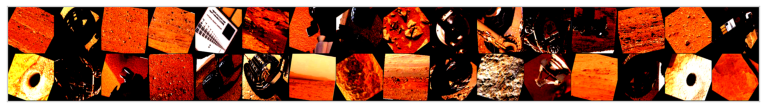

In [41]:
show_batch(train_dl,invert=True)

In [42]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassification(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))

In [43]:
!pip install timm
import timm
class FlowerModel(ImageClassification):
    def __init__(self, n_classes, pretrained=False):

        super(FlowerModel, self).__init__()

        self.model = timm.create_model("vit_base_patch16_224", pretrained=True)
        # if pretrained:
        #     self.model.load_state_dict(torch.load(MODEL_PATH))

        self.model.head = nn.Linear(self.model.head.in_features, n_classes)
        
    def forward(self, xb):
        return self.model(xb)

     |████████████████████████████████| 376 kB 5.1 MB/s 


In [44]:
model = FlowerModel(n_classes=24, pretrained=True)
model

FlowerModel(
  (model): VisionTransformer(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      (norm): Identity()
    )
    (pos_drop): Dropout(p=0.0, inplace=False)
    (blocks): Sequential(
      (0): Block(
        (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=768, out_features=2304, bias=True)
          (attn_drop): Dropout(p=0.0, inplace=False)
          (proj): Linear(in_features=768, out_features=768, bias=True)
          (proj_drop): Dropout(p=0.0, inplace=False)
        )
        (drop_path): Identity()
        (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): Mlp(
          (fc1): Linear(in_features=768, out_features=3072, bias=True)
          (act): GELU()
          (fc2): Linear(in_features=3072, out_features=768, bias=True)
          (drop): Dropout(p=0.0, inplace=False)
        )
      )
      (1): Block(
        

In [45]:
 for images, labels in train_dl:
    print('images.shape:', images.shape)
    out = model(images)
    print('out.shape:', out.shape)
    print('out[0]:', out[0])
    break

images.shape: torch.Size([32, 3, 224, 224])
out.shape: torch.Size([32, 24])
out[0]: tensor([ 0.6103,  0.5967,  2.7141, -1.8373, -0.1503, -0.6397, -0.2450, -2.9771,
        -1.1667, -0.0621, -0.5704,  1.1962, -0.5771, -3.9012, -2.7447, -1.4376,
        -1.9827,  1.6348,  1.1193, -0.9782,  4.6666,  2.2857,  0.1037, -0.5782],
       grad_fn=<SelectBackward>)


In [46]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history


In [47]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)
device = get_default_device()

In [48]:
device = get_default_device()
device

device(type='cpu')

In [49]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
to_device(model, device);


In [50]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class FlowerClassification(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))

In [51]:
class FlowerModel18(FlowerClassification):
    def __init__(self):
        super().__init__()
        # Use a pretrained model
        self.network = models.resnet18(pretrained=True)
        # Replace last layer
        num_ftrs = self.network.fc.in_features
        self.network.fc = nn.Linear(num_ftrs, 24)
        
    def forward(self, xb):
        return torch.sigmoid(self.network(xb))

In [52]:
model = to_device(FlowerModel18(), device)
evaluate(model, val_dl)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


{'val_acc': 0.07125686854124069, 'val_loss': 3.1713576316833496}

In [53]:
num_epochs = 20
opt_func = torch.optim.Adam
lr =  0.0001

In [54]:
%%time
try3 = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

Epoch [0], train_loss: 2.5455, val_loss: 2.3453, val_acc: 0.9405
Epoch [1], train_loss: 2.3285, val_loss: 2.2927, val_acc: 0.9669
Epoch [2], train_loss: 2.2901, val_loss: 2.2795, val_acc: 0.9778
Epoch [3], train_loss: 2.2787, val_loss: 2.2729, val_acc: 0.9736
Epoch [4], train_loss: 2.2726, val_loss: 2.2667, val_acc: 0.9808
Epoch [5], train_loss: 2.2686, val_loss: 2.2675, val_acc: 0.9790
Epoch [6], train_loss: 2.2664, val_loss: 2.2634, val_acc: 0.9802
Epoch [7], train_loss: 2.2648, val_loss: 2.2639, val_acc: 0.9796
Epoch [8], train_loss: 2.2708, val_loss: 2.2638, val_acc: 0.9820
Epoch [9], train_loss: 2.2625, val_loss: 2.2622, val_acc: 0.9808
Epoch [10], train_loss: 2.2619, val_loss: 2.2611, val_acc: 0.9808
Epoch [11], train_loss: 2.2584, val_loss: 2.2627, val_acc: 0.9820
Epoch [12], train_loss: 2.2595, val_loss: 2.2634, val_acc: 0.9808
Epoch [13], train_loss: 2.2626, val_loss: 2.2666, val_acc: 0.9772
Epoch [14], train_loss: 2.2611, val_loss: 2.2612, val_acc: 0.9814
Epoch [15], train_lo

In [55]:
evaluate(model, train_dl)

{'val_acc': 0.9904661178588867, 'val_loss': 2.250985860824585}

In [56]:
evaluate(model, val_dl)

{'val_acc': 0.9789663553237915, 'val_loss': 2.2622859477996826}

In [57]:
evaluate(model, test_dl)

{'val_acc': 0.9756097793579102, 'val_loss': 2.2611727714538574}

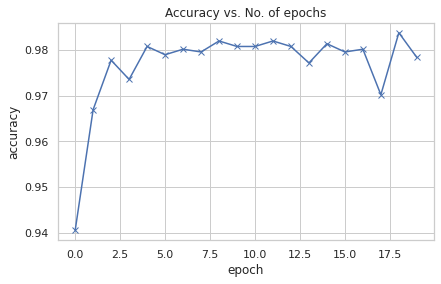

In [58]:
def plot_accuracies(try3):
    accuracies = [x['val_acc'] for x in try3]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

plot_accuracies(try3)

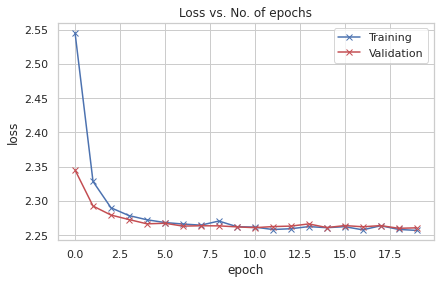

In [59]:
def plot_losses(try3):
    train_losses = [x.get('train_loss') for x in try3]
    val_losses = [x['val_loss'] for x in try3]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');
plot_losses(try3)

In [60]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return flower_label[preds[0].item()]

Label: class_8 , Predicted: class_9


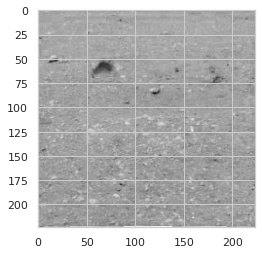

In [61]:
img, label = test_ds[17]
plt.imshow(img[0], cmap='gray')
print('Label:', database.classes[label], ', Predicted:', predict_image(img, FlowerModel18()))


Label: class_7 , Predicted: class_2


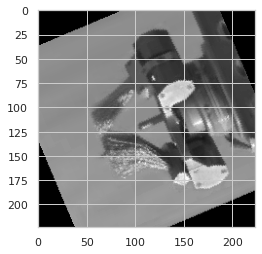

In [62]:
img, label = test_ds[10]
plt.imshow(img[0], cmap='gray')
print('Label:', database.classes[label], ', Predicted:', predict_image(img, FlowerModel18()))



In [63]:
torch.save(model.state_dict(), '/content/gdrive/My Drive/Space/Flower-classification3.pth')

In [64]:
from sklearn import metrics as sk_metrics
import seaborn as sn
from sklearn.metrics import confusion_matrix, classification_report

y_pred = []
y_valid = []
for ind, batch in enumerate(test_dl):
    pred_probs = model(batch[0])
    y_pred.extend(pred_probs.argmax(axis=-1).cpu().numpy())
    y_valid.extend(batch[1])

# Calculate needed metrics
print(f'Accuracy score on test data:\t{sk_metrics.accuracy_score(y_valid, y_pred)}')
print(f'Macro F1 score on test data:\t{sk_metrics.f1_score(y_valid, y_pred, average="macro")}')

Accuracy score on test data:	0.9739263803680982
Macro F1 score on test data:	0.9685688650457234


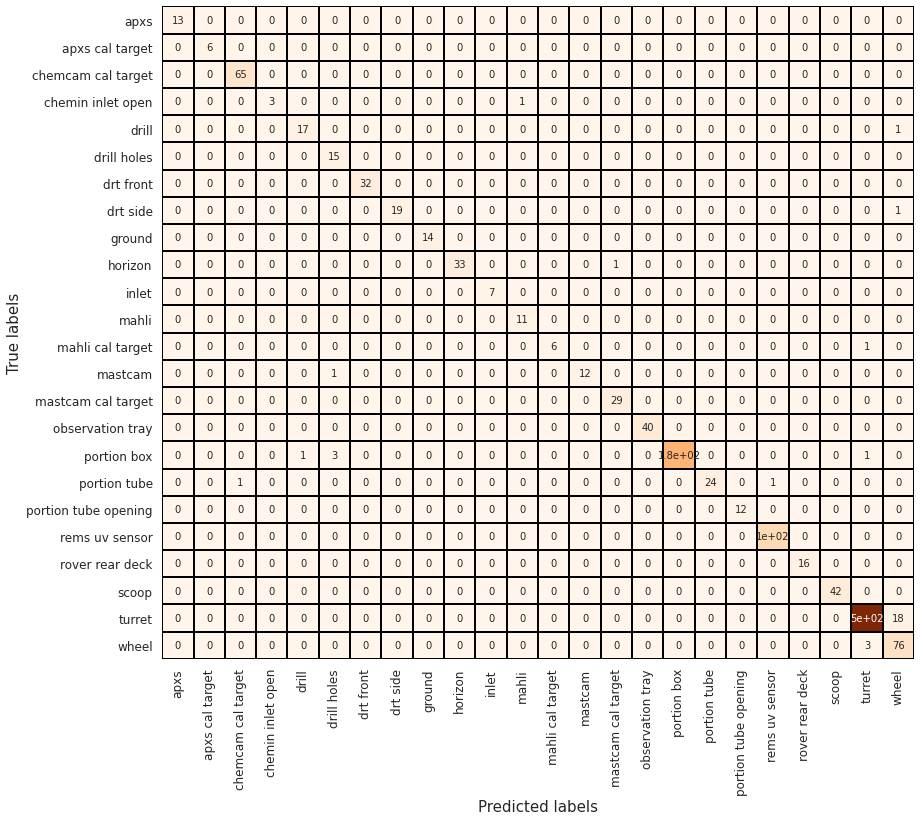

In [65]:
# Calculate confusion matrix
labels = ["apxs","apxs cal target","chemcam cal target","chemin inlet open","drill","drill holes","drt front","drt side","ground","horizon","inlet","mahli","mahli cal target","mastcam","mastcam cal target","observation tray","portion box","portion tube","portion tube opening","rems uv sensor","rover rear deck","scoop","turret","wheel"]
confusion_matrix = sk_metrics.confusion_matrix(y_valid, y_pred)
df_confusion_matrix = pd.DataFrame(confusion_matrix,index=labels,columns=labels)

# Show confusion matrix
plt.figure(figsize=(12, 12))
sn.heatmap(df_confusion_matrix, annot=True, cbar=False, cmap='Oranges', linewidths=1, linecolor='black')
plt.xlabel('Predicted labels', fontsize=15)
plt.xticks(fontsize=12)
plt.ylabel('True labels', fontsize=15)
plt.yticks(fontsize=12);


In [66]:
cm = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
accuracies = cm.diagonal()
list_acc =  accuracies.tolist()
list_acc.append(0)
list_acc.append(0)
list_acc.append(0)

report = classification_report(y_valid, y_pred,                        
                               output_dict=True,
                               target_names=labels)
report_df = pd.DataFrame(report).transpose()
report_df["accuracy"] = list_acc
pd.set_option("display.max_rows", None)
report_df.head(134)

,precision,recall,f1-score,support,accuracy
apxs,1.000000,1.000000,1.000000,13.000000,1.000000
apxs cal target,1.000000,1.000000,1.000000,6.000000,1.000000
chemcam cal target,0.984848,1.000000,0.992366,65.000000,1.000000
chemin inlet open,1.000000,0.750000,0.857143,4.000000,0.750000
drill,0.944444,0.944444,0.944444,18.000000,0.944444
drill holes,0.789474,1.000000,0.882353,15.000000,1.000000
drt front,1.000000,1.000000,1.000000,32.000000,1.000000
drt side,1.000000,0.950000,0.974359,20.000000,0.950000
ground,1.000000,1.000000,1.000000,14.000000,1.000000
horizon,1.000000,0.970588,0.985075,34.000000,0.970588
